<a href="https://colab.research.google.com/github/venu-analytics/Analytics-Projects/blob/main/ML_Case_Study_Venugopal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML Case Study**

Please use Python for the following. Document your steps and state any assumptions you make. A single
Jupyter notebook file (.ipynb) with your approach and code is sufficient. Make sure it is commented and
easy to follow. If you prefer, you can submit a text document with your analysis too.
The data for the case study comes from the Census Income data set in the UCI Machine Learning
Repository. Your objective is to predict whether income of an individual exceeds $50K/per year based
on census data. More importantly the objective for you is to demonstrate how you tackle a traditional
supervised learning problem.

1) Download the data from the following link http://archive.ics.uci.edu/ml/datasets/Adult into
Python.

2) Read the Attribute Information from the web page. More information can be found in the Data Set Description.

3) Be sure to document your steps and your rationale behind each one of them. This is best done with Jupyter notebook or a word document.

4) Predict the class variable using the given attributes. Use two supervised learning methods. Avoid over-fitting.

5) Assess the performance of your models using appropriate metrics. Discuss which model is best and why.

6) Please provide an explanation in plain English of the business problem you were trying to solve and your analysis of the outcomes. Please add any supporting visualizations to support your explanation.

7) This is intentionally left somewhat open-ended. We want to see how you approach the problem.

**Please Note:** We expect you to approach this business problem with honesty and integrity and rely on
your knowledge of machine learning. Please do not copy from any web-based repository. Candidates
will be disqualified if we notice attempts of plagiarism.

In [174]:
# Let's import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [175]:
# Let's import the data from UCI Machine learning repo
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [176]:
# Add column names from data description
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Analysing The data

In [177]:
# Checking the unique elements in the income column
data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

Let's Create label column as per income column from the dataset.
where:

*   label 1 = income['>50k']
*   label 0 = income['<=50k']



In [178]:
# Creating label column out of income column
data['label'] = np.where(data['income']==' <=50K',0,1)
data = data.drop('income', axis=1)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [179]:
# Checking the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [180]:
# Checking the statistical insights of numerical data in the dataset
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [181]:
# ratio of label
data.label.value_counts()

0    24720
1     7841
Name: label, dtype: int64

Let's check what percent of people are earning more than $50k in an year.

In [182]:
# what percent of people are earning more than $50k in an year.
lessThan_50k = data[data.label == 0]
greaterThan_50k = data[data.label == 1]

num_lessThan_50k = lessThan_50k.shape[0]
num_greaterThan_50k = greaterThan_50k.shape[0]

print( num_lessThan_50k / (num_lessThan_50k + num_greaterThan_50k)*100, "% of People are earning less than $50k")
print( num_greaterThan_50k / (num_greaterThan_50k + num_lessThan_50k)*100, "% of People are earning greater than $50k")

75.91904425539757 % of People are earning less than $50k
24.080955744602438 % of People are earning greater than $50k


So, 75% of the people are having income less than 50k dollars whereas ~25% of the people are earning more than $50k income in an year. 

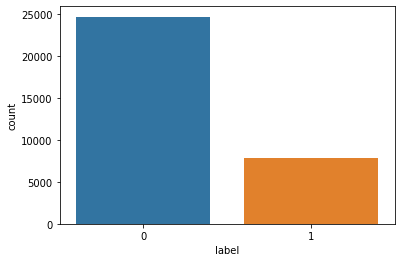

In [208]:
# Visualising the ratio of the label
sb.countplot(data['label'])
plt.show()

Now, analysing the relationship of each variable with respected to label data.

Let's start with age by grouping the ages into 6 bins.

In [184]:
# Grouping the age into 6 bins starting min age of 17 and max age of 90
bins = [17, 30, 40, 50, 60, 70, 120]
labels = ['17-30', '31-40', '41-50', '51-60', '61-70', '71+']
data['age_range'] = pd.cut(data.age, bins, labels = labels, include_lowest = True)

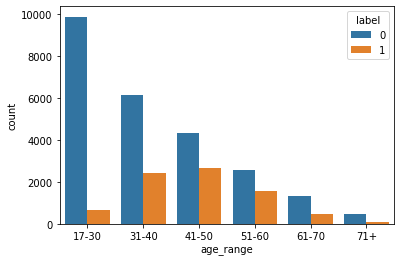

In [185]:
# Visualising the relation between age and label
sb.countplot(data.age_range, hue=data.label)
plt.show()

From the above image we can see that persons belongs to the age group of 30-59 are earning more than $50k and age is an important variable in explaining the label.

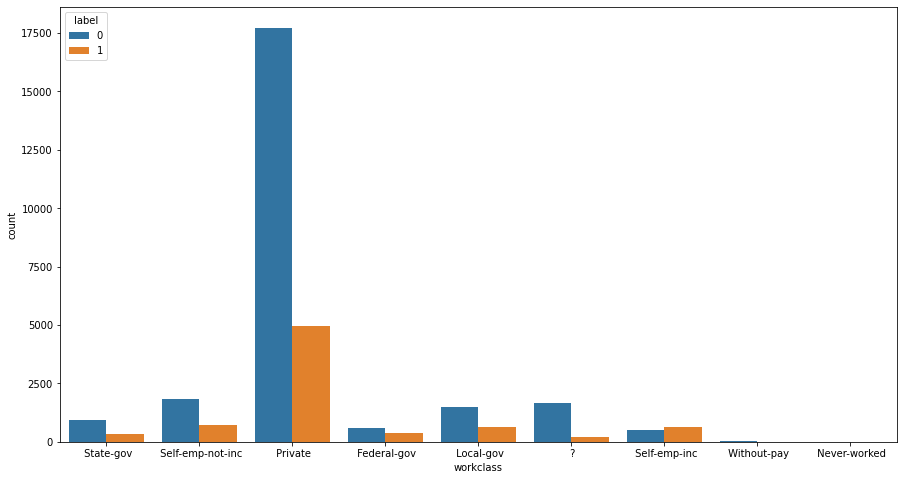

In [186]:
# Visualising the relation between work class and label
dims = (15,8)
fig,ax = plt.subplots(figsize=dims)
sb.countplot(ax=ax, x='workclass',data=data, hue='label')
plt.show()

From above image we can analyse that the people who are working in private sector are earning more than $50k.

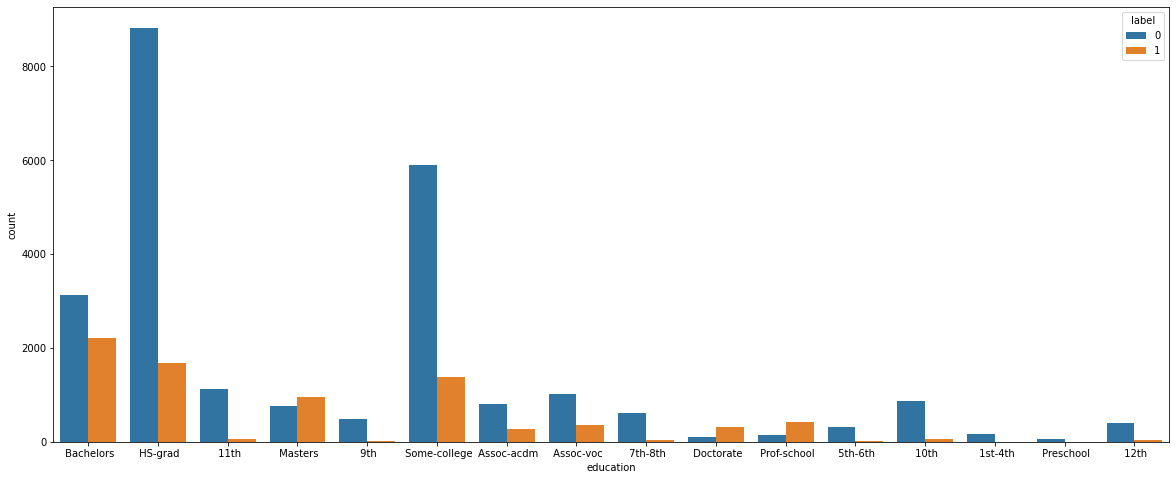

In [187]:
# Visualising the relation between education and label
dims = (20,8)
fig,ax = plt.subplots(figsize=dims)
sb.countplot(ax=ax, x='education',data=data, hue='label')
plt.show()

People who are high school graduates and also who has done their bachelors are earning more than $50k.

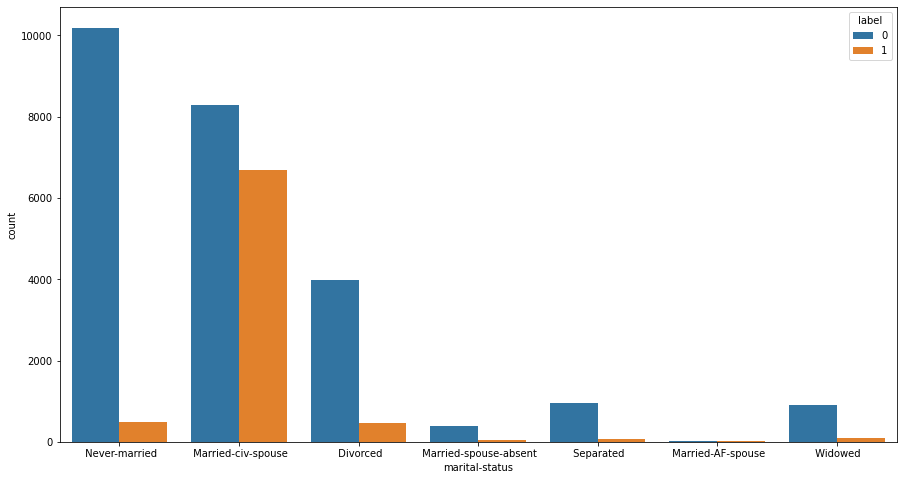

In [188]:
# Visualising the relation between marital-status and label
dims = (15,8)
fig,ax = plt.subplots(figsize=dims)
sb.countplot(ax=ax, x='marital-status',data=data, hue='label')
plt.show()

From the above image it is found that the persons who are categorised as Married-civ-spouse are earning more than $50k.

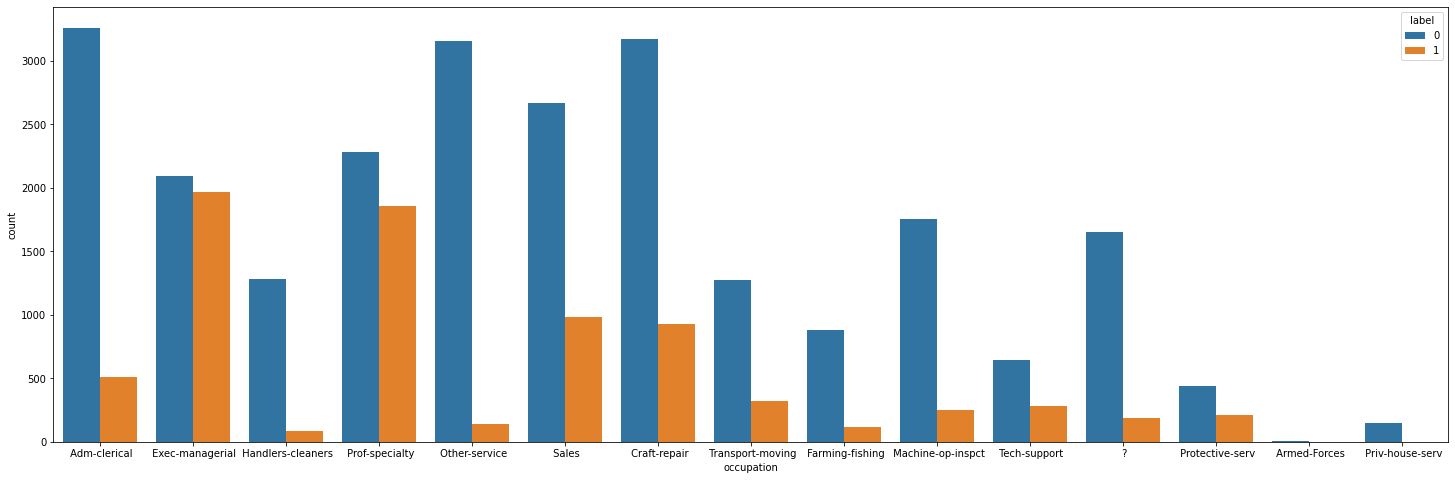

In [189]:
# Visualising the relation between occupation and label
dims = (25,8)
fig,ax = plt.subplots(figsize=dims)
sb.countplot(ax=ax, x='occupation',data=data, hue='label')
plt.show()

The people who are working in the occupation of both Exec-managerial and Prof-speciality are earning more than $50k.

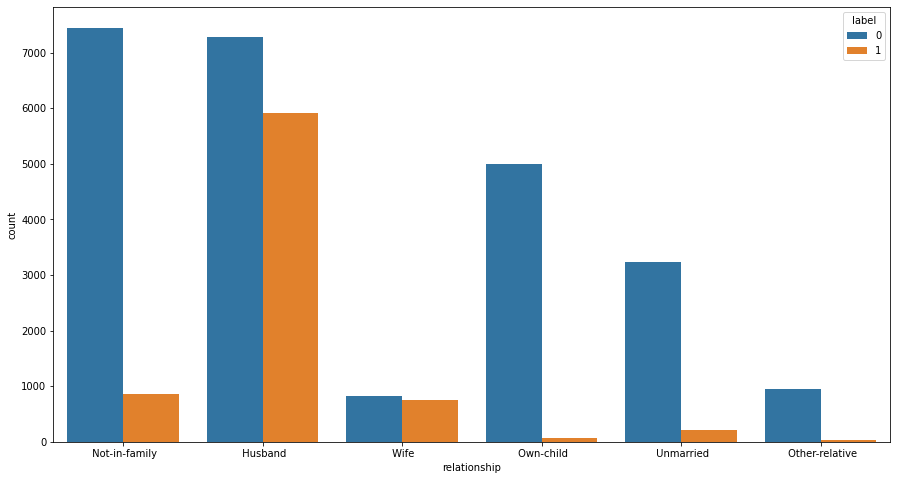

In [190]:
# Visualising the relation between relationship and label
dims = (15,8)
fig,ax = plt.subplots(figsize=dims)
sb.countplot(ax=ax, x='relationship',data=data, hue='label')
plt.show()

From the above image we can analyse that the married men are earning more than $50k.

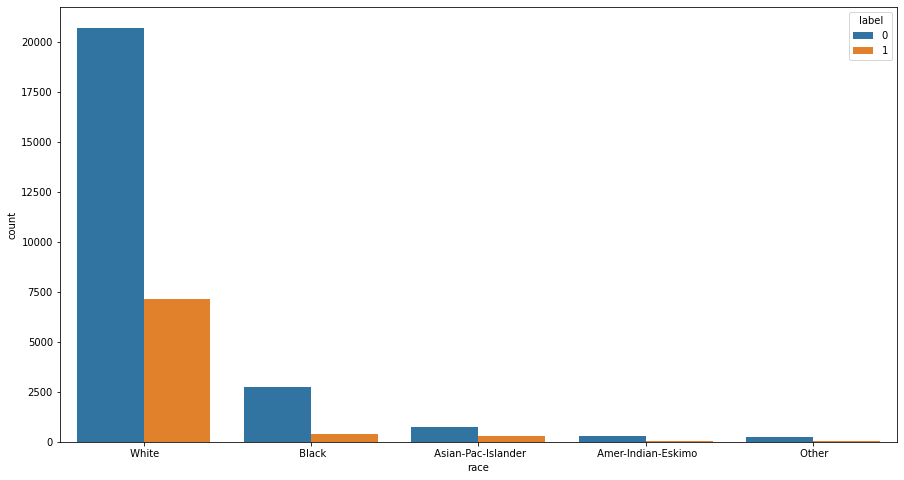

In [191]:
# Visualising the relation between race and label
dims = (15,8)
fig,ax = plt.subplots(figsize=dims)
sb.countplot(ax=ax, x='race',data=data, hue='label')
plt.show()

**Observation:** From the plot we can observe that the sample is biased towards white people because out of entire data sample more than 80% of the data belongs to white out of which nearly 7000 people are earning more than $50k.

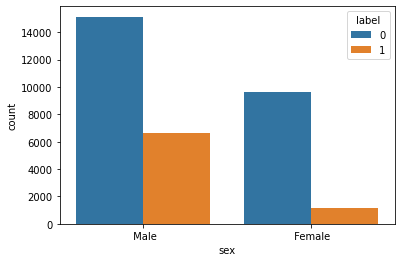

In [192]:
# Visualising the relation between gender and label
sb.countplot(data.sex, hue=data.label)
plt.show()

From the image we can observe that Males are earning more than $50k than Females.

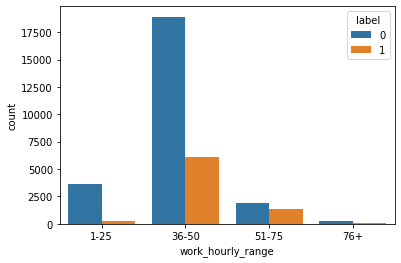

In [193]:
# Grouping the number of hours of work column and visualising it by using seaborn.
bins = [1,25,50,75,100]
labels = ['1-25', '36-50', '51-75', '76+']
data['work_hourly_range'] = pd.cut(data['hours-per-week'], bins, labels = labels, include_lowest = True)
sb.countplot(data['work_hourly_range'], hue=data.label)
plt.show()

We can observe that the people who are working atleast 36-50 hours per week are earning more than $50k.

(-0.7, 14.7)

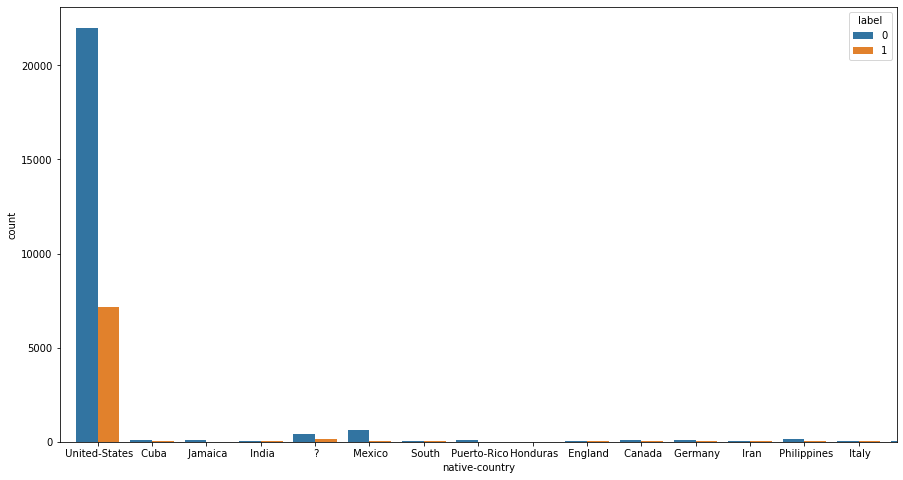

In [194]:
# Visualising the relation between native-country and label
dims = (15,8)
fig,ax = plt.subplots(figsize=dims)
sb.countplot(ax=ax, x='native-country', hue='label', data=data)
ax.set_xlim(-0.7, 14.7)

From the above image we can observe that out of all countries, the people who are working in United-Sates are earning more than $50k.

Let's have a prediction model to check which attribute is emplaining more that the people who are earning more than $50k.

## Prediction Model

In [195]:
# checking whether the data is having missing values or not
data.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
label                0
age_range            0
work_hourly_range    0
dtype: int64

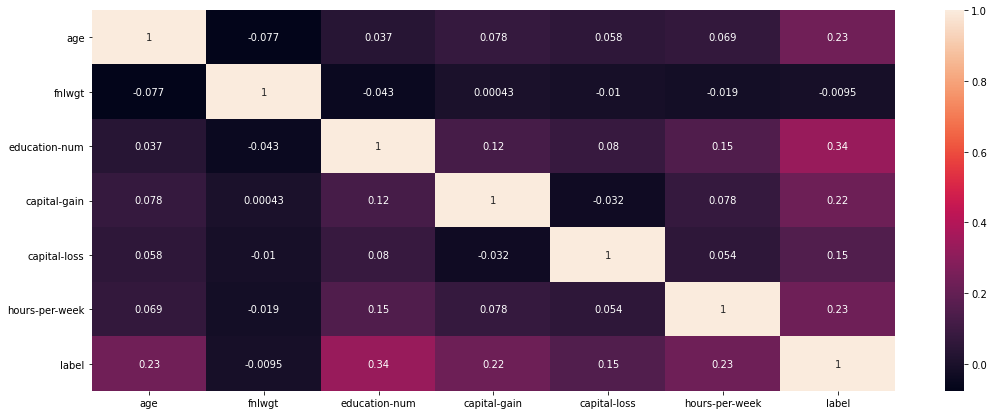

In [196]:
# Let's check the correlation of the each attribute
plt.figure(figsize=[18,7])
sb.heatmap(data.corr(), annot=True)
plt.show()

Since fnlwgt,age,education,hours-per-week these attributes are not explaining much about the label we can remove them.

In [197]:
# Finalising the attributes for the prediction model
final_data = data.drop(['fnlwgt','age','education','hours-per-week'], axis=1)
final_data.head()

,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,label,age_range,work_hourly_range
0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,United-States,0,31-40,36-50
1,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,United-States,0,41-50,1-25
2,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,United-States,0,31-40,36-50
3,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,United-States,0,51-60,36-50
4,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Cuba,0,17-30,36-50


Converting categorial variables into numerical variables by creating dummies.

In [198]:
# Converting categorical variable into numerical variable
df_dummies = pd.get_dummies(final_data, drop_first=True)
df_dummies.head()

,education-num,capital-gain,capital-loss,label,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,...,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age_range_31-40,age_range_41-50,age_range_51-60,age_range_61-70,age_range_71+,work_hourly_range_36-50,work_hourly_range_51-75,work_hourly_range_76+
0,13,2174,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,13,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,7,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
4,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Let's split the entire data into train and test data.

In [199]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x = df_dummies.drop(['label'], axis=1)
y = df_dummies['label']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)

Let's normalise the data to make sure data in certain range as well as to eliminate the outliers if any.

In [200]:
# Normalising the data
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(xtrain)
scal_xtrain = norm_fit.transform(xtrain)
scal_xtest = norm_fit.transform(xtest)
print(scal_xtrain)

[[0.73333333 0.         0.43319559 ... 1.         0.         0.        ]
 [0.6        0.         0.         ... 1.         0.         0.        ]
 [0.8        0.         0.         ... 0.         1.         0.        ]
 ...
 [0.6        0.         0.         ... 0.         0.         0.        ]
 [0.4        0.         0.48875115 ... 0.         1.         0.        ]
 [0.53333333 0.         0.         ... 1.         0.         0.        ]]


Let's have a prediction model by using the random forest classifier

## Random Forest Classifier

In [201]:
# Prediction model by using the random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rnd = RandomForestClassifier()
rnd_fit = rnd.fit(scal_xtrain,ytrain)
rnd_score = rnd.score(scal_xtest,ytest)
print("Score of the Model is :{}".format(rnd_score))

Score of the Model is :0.8493781667434362


Let's check the classification report for the random forest classifier.

In [202]:
y_pred_rf = rnd.predict(scal_xtest)
cr = classification_report(y_pred_rf, ytest)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5123
           1       0.63      0.72      0.67      1390

    accuracy                           0.85      6513
   macro avg       0.77      0.80      0.79      6513
weighted avg       0.86      0.85      0.85      6513



From the report we can see that recall of the model is 72% which means model is correctly identified about 72% of the people will be earning more than $50k.

The following code creates a bar plot of the top 10 features for predicting the persons who will be earning more than $50k.

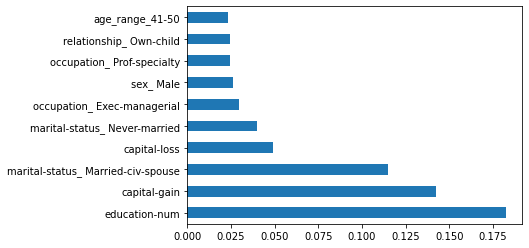

In [203]:
feat_importance = pd.Series(rnd.feature_importances_, index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')

Based on the image we can observe that education is having high impact on predicting customers who will be earning more than $50k followed by capital-gain.

## KNN Classifier

Training the KNN model on train set



In [204]:
# Training the model by using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier.fit(scal_xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [205]:
# Let's predict by using the KNN Classifier
y_pred = classifier.predict(scal_xtest)

Making the confusion matrix and calculate the accuracy of the model.

In [206]:
# Calculating the accuracy and forming the confusion matrix for validation
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest,y_pred)
accuracy = accuracy_score(ytest,y_pred)
print("Confusion Matrix : {}".format(cm))
print("Accuracy Score : {}".format(accuracy))

Confusion Matrix : [[4490  430]
 [ 733  860]]
Accuracy Score : 0.8214340549669891


Let's check the classification report for the KNN classifier.

In [207]:
knn_cr = classification_report(y_pred, ytest)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      5223
           1       0.54      0.67      0.60      1290

    accuracy                           0.82      6513
   macro avg       0.73      0.76      0.74      6513
weighted avg       0.84      0.82      0.83      6513



From the report we can see that recall of the model is 67% which means model is correctly identified about 67% of the people will be earning more than $50k.

## Conclusion

**Insights:**


*   Persons belongs to the age group of 30-59 are earning more than $50k and age is an important variable in explaining the label.

*   People who are working in private sector are earning more than 50k dollars.
*   People who are high school graduates and also who has done their bachelors are earning more than $50k.


*   Persons who are categorised as Married-civ-spouse are earning more than 50k dollars.

*   People who are working in the occupation of both Exec-managerial and Prof-speciality are earning more than $50k.

*   The married men are earning more than 50k dollars.
*   The sample is biased towards white people because out of entire data sample more than 80% of the data belongs to white out of which nearly 7000 people are earning more than $50k.


*   Males are earning more than 50k dollars than Females.

*   People who are working atleast 36-50 hours per week are earning more than $50k.
*   People who are working in United-Sates are earning more than 50k dollars.

**Model Insights:**


From the prediction results that we got by using the above two prediction algorithms we can see that Random Forest(RF) is considered as a best choice because of following reasons.

*   From the RF classification report we can see that recall of the model is 72% which means model is correctly identified about 72% of the people will be earning more than $50k.
*   Whereas KNN classification report we can see that recall of the model is 67% which means model is correctly identified about 67% of the people will be earning more than 50k dollars.


*   In terms of model interpretability RF can give feature importance(Attributes which are contributed more towards the prediction) whereas KNN cannot give the feature importance.


*   Since the major portion of the data are in categorical nature we can see that RF is out-performing than the distance based classifier i.e, KNN classifier.









